In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import numpy as np

# ファイル読み込み
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# データの概要を表示
print(train.shape)
print(train.columns)
print(train.head())

(750000, 10)
Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')
   id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   
3   3           35        62        54     Sandy     Barley        39   
4   4           35        58        43       Red      Paddy        37   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
3         12            4        10-26-26  
4          2           16             DAP  


In [3]:
train = pd.read_csv("train.csv")
print(train.describe())

target = "Fertilizer Name" 

                  id    Temparature       Humidity       Moisture  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      31.503565      61.038912      45.184147   
std    216506.495284       4.025574       6.647695      11.794594   
min         0.000000      25.000000      50.000000      25.000000   
25%    187499.750000      28.000000      55.000000      35.000000   
50%    374999.500000      32.000000      61.000000      45.000000   
75%    562499.250000      35.000000      67.000000      55.000000   
max    749999.000000      38.000000      72.000000      65.000000   

            Nitrogen      Potassium    Phosphorous  
count  750000.000000  750000.000000  750000.000000  
mean       23.093808       9.478296      21.073227  
std        11.216125       5.765622      12.346831  
min         4.000000       0.000000       0.000000  
25%        13.000000       4.000000      10.000000  
50%        23.000000       9.000000      21.000000  
75%    

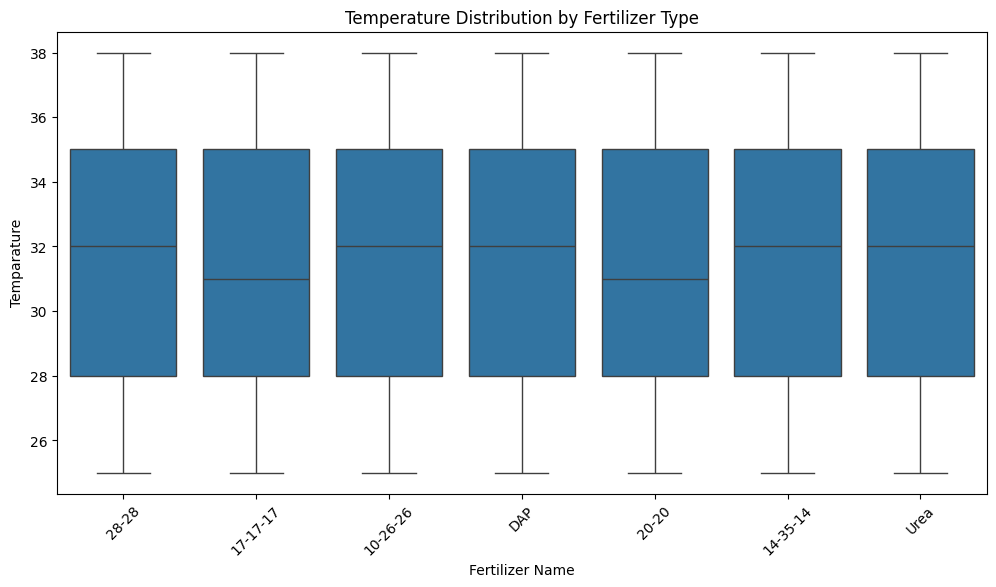

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x=target, y='Temparature') 
plt.xticks(rotation=45)
plt.title("Temperature Distribution by Fertilizer Type")
plt.show()

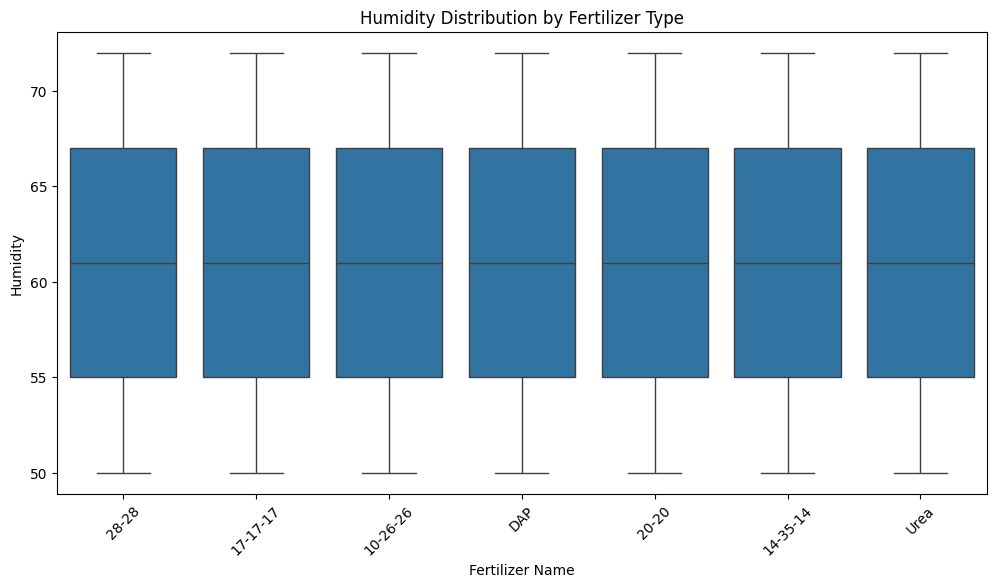

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x=target, y='Humidity') 
plt.xticks(rotation=45)
plt.title("Humidity Distribution by Fertilizer Type")
plt.show()

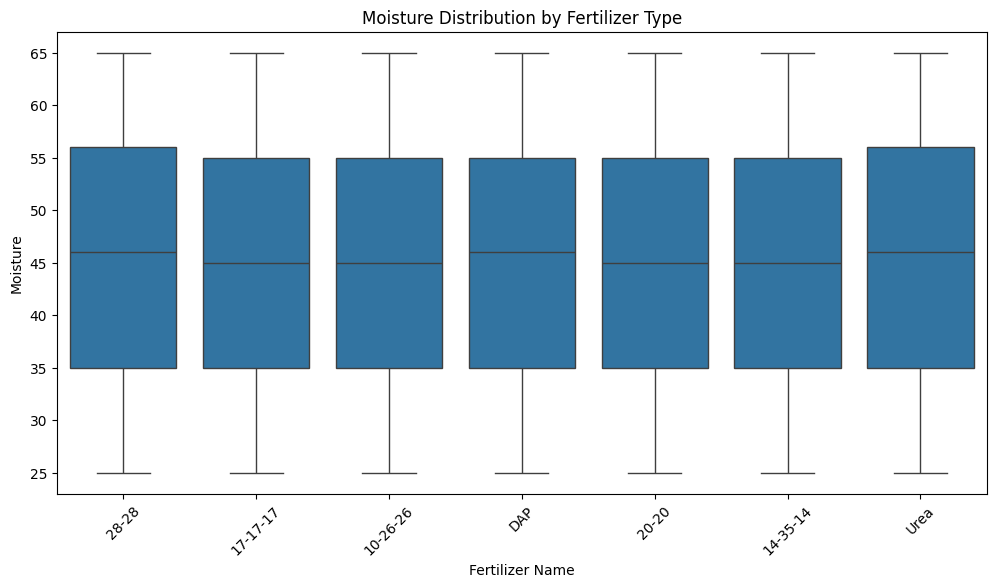

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x=target, y='Moisture') 
plt.xticks(rotation=45)
plt.title("Moisture Distribution by Fertilizer Type")
plt.show()

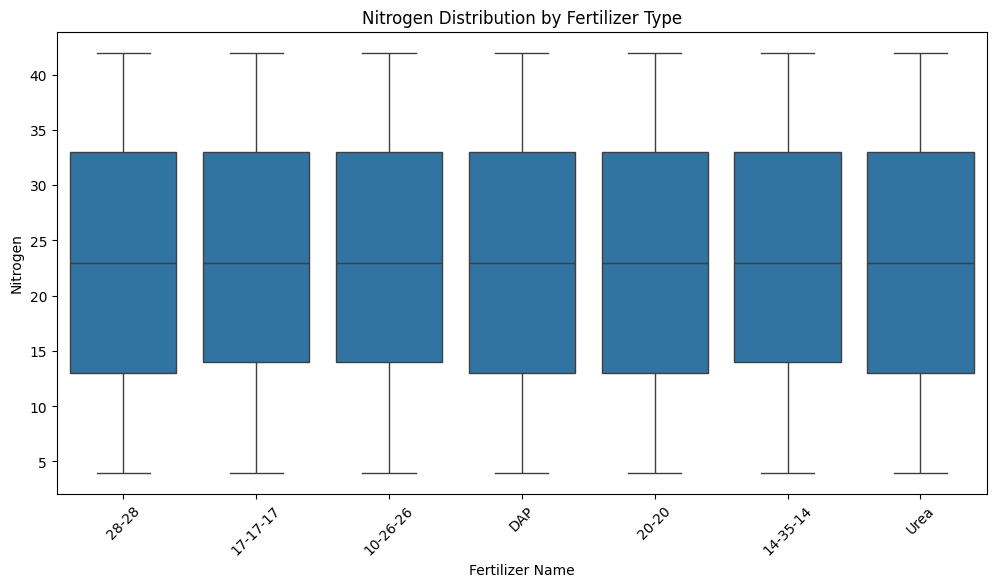

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x=target, y='Nitrogen') 
plt.xticks(rotation=45)
plt.title("Nitrogen Distribution by Fertilizer Type")
plt.show()

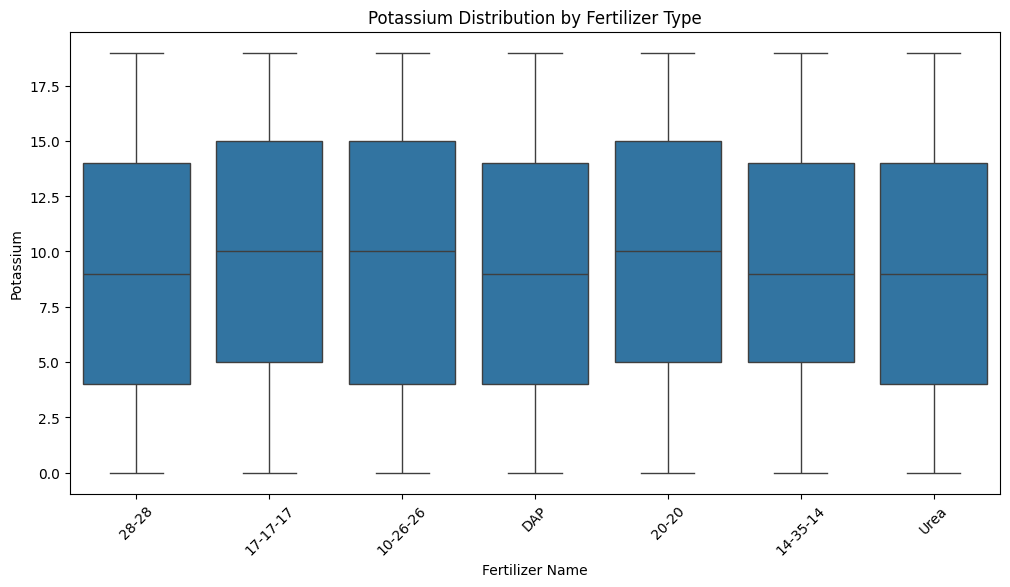

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x=target, y='Potassium') 
plt.xticks(rotation=45)
plt.title("Potassium Distribution by Fertilizer Type")
plt.show()

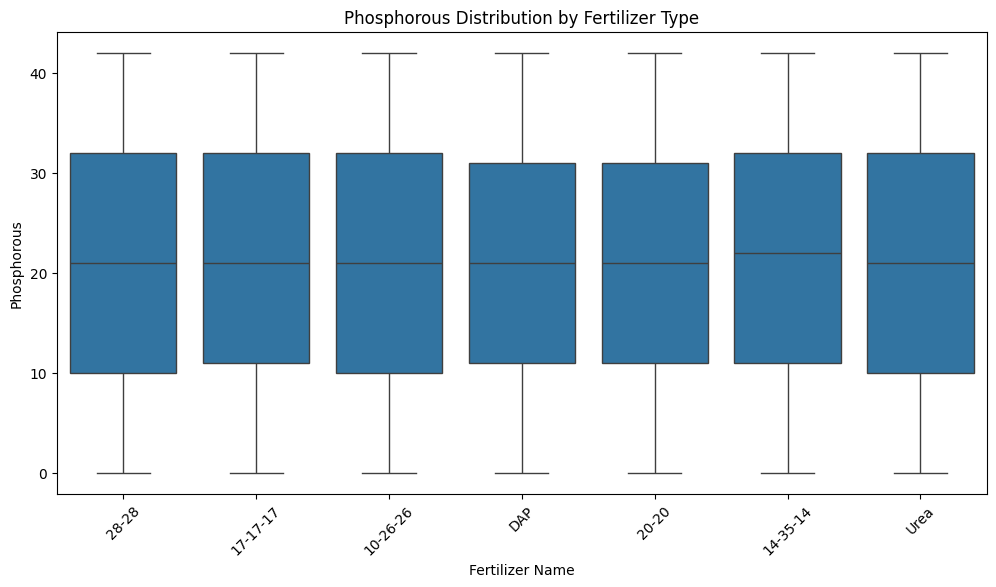

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x=target, y='Phosphorous') 
plt.xticks(rotation=45)
plt.title("Phosphorous Distribution by Fertilizer Type")
plt.show()

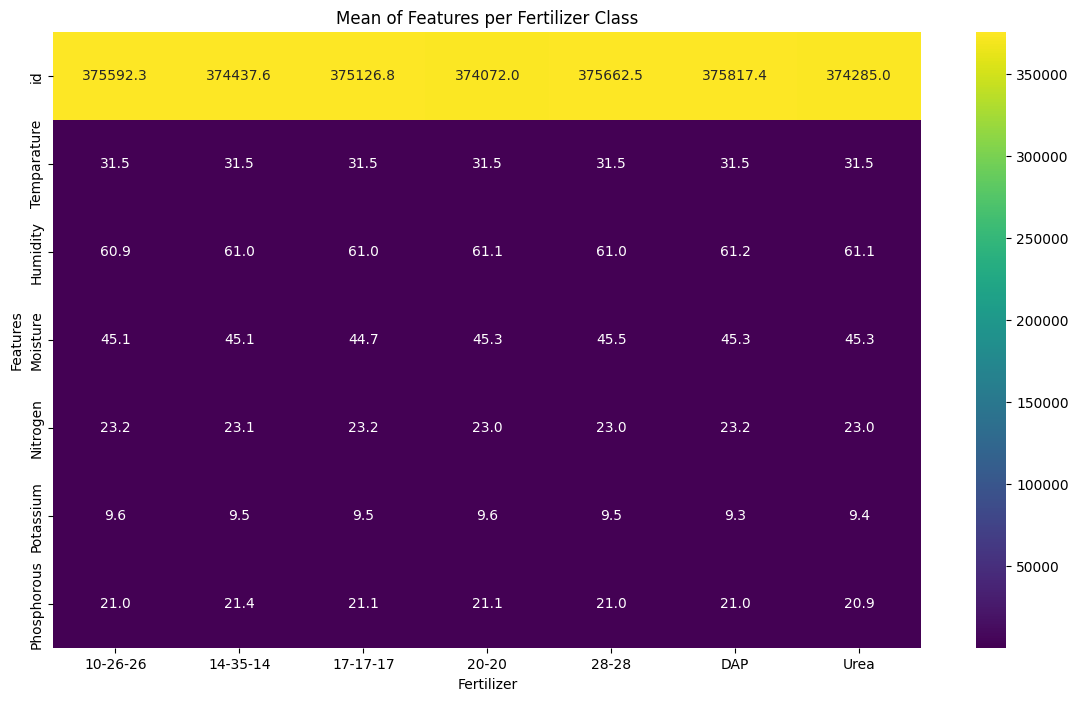

In [10]:
numeric_cols = train.select_dtypes(include='number').columns.drop('ID', errors='ignore')
grouped = train.groupby(target)[numeric_cols].mean().T

plt.figure(figsize=(14, 8))
sns.heatmap(grouped, cmap='viridis', annot=True, fmt=".1f")
plt.title("Mean of Features per Fertilizer Class")
plt.ylabel("Features")
plt.xlabel("Fertilizer")
plt.show()


In [42]:
drop_cols = ['id'] 
X = train.drop(columns=drop_cols + ['Fertilizer Name'])
y = train['Fertilizer Name']

for col in ['Soil Type', 'Crop Type']:
    X[col] = X[col].astype('category')
    
# 特徴量追加
X['N-P'] = X['Nitrogen']- X['Potassium']
X['N-K'] = X['Nitrogen']- X['Phosphorous']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    num_leaves=48,
    max_depth=10,
    learning_rate=0.05,
    n_estimators=300
    )
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_pred = np.array(y_pred)

print(classification_report(y_val, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
              precision    recall  f1-score   support

    10-26-26       0.20      0.15      0.17     22777
    14-35-14       0.20      0.17      0.19     22887
    17-17-17       0.21   

In [31]:
probs = model.predict_proba(X_val)  # shape = (n_samples, n_classes)
probs = np.array(probs)

# クラスのラベル名（文字列）
class_labels = model.classes_ # 例：["10-26-26", "14-35-14", ..., "Urea"]
print(class_labels)

# 上位3予測を取得
top3_preds = np.argsort(probs, axis=1)[:, -3:][:, ::-1]  # 上位3つ、降順に
print(top3_preds.shape)
print(top3_preds[0])
print(type(top3_preds[0]))

print(top3_preds[:5])
print(y_val.head())

['10-26-26' '14-35-14' '17-17-17' '20-20' '28-28' 'DAP' 'Urea']
(150000, 3)
[1 6 5]
<class 'numpy.ndarray'>
[[1 6 5]
 [1 2 0]
 [4 2 5]
 [5 3 6]
 [4 2 0]]
721206       20-20
330457    17-17-17
325319       20-20
83396     10-26-26
586868       28-28
Name: Fertilizer Name, dtype: object


In [28]:
def apk(actual, predicted, k=3):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of items.
    """
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p == actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    return score

def mapk(actual_list, predicted_lists, k=3):
    """
    Computes the mean average precision at k.
    actual_list: list of ground truth labels
    predicted_lists: list of lists, each containing k predicted labels
    """
    return np.mean([apk(a, p, k) for a, p in zip(actual_list, predicted_lists)])

In [39]:

top3_labels = [[class_labels[i] for i in row] for row in top3_preds]

# 実際のラベル（正解ラベル）をリスト形式に
actual_labels = y_val.values.tolist()

# MAP@3 を計算
score = mapk(actual_labels, top3_labels, k=3)
print(f"MAP@3 score: {score:.4f}")

MAP@3 score: 0.3248


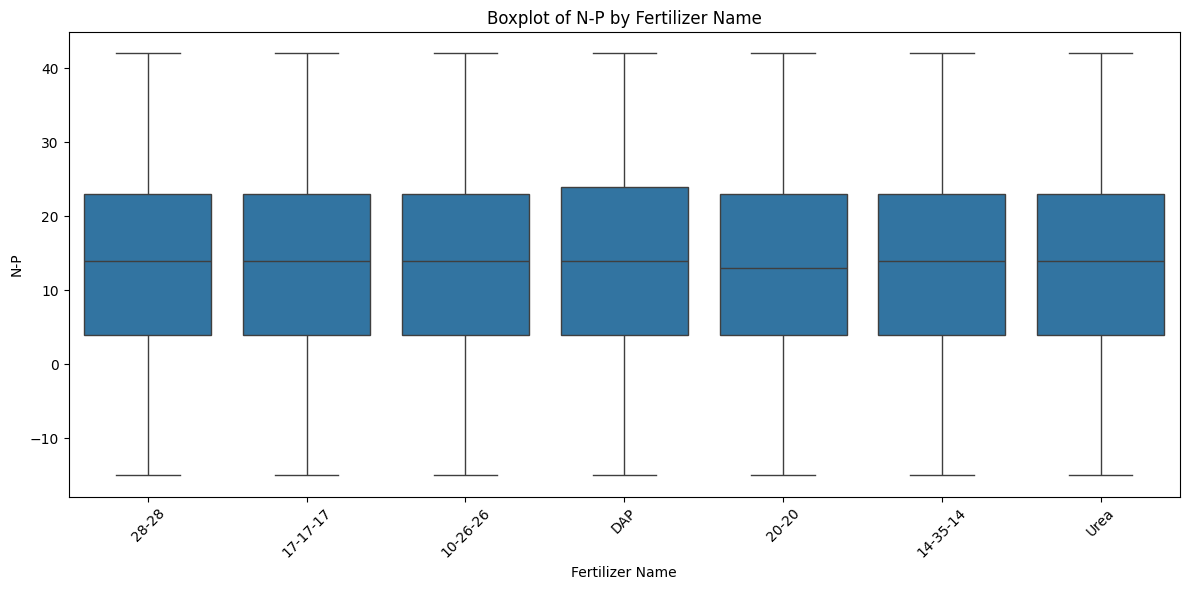

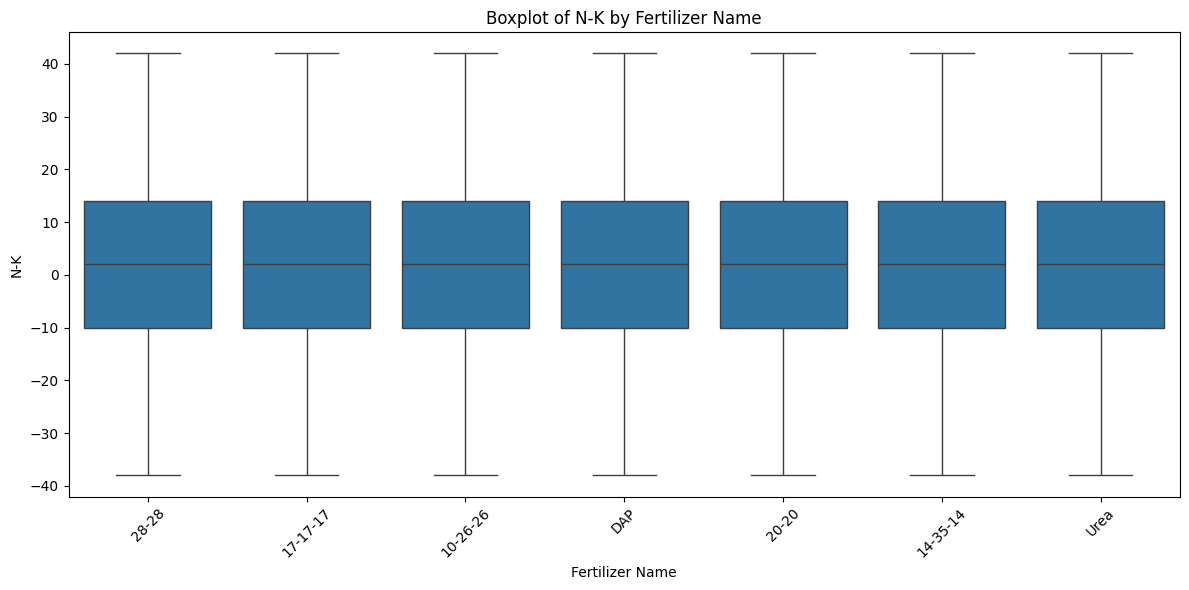

In [27]:
new_features = ['N-P', 'N-K']

plot_df = X.copy()
plot_df['Fertilizer Name'] = y.values  # ラベル列を追加

# 箱ひげ図を特徴量ごとにプロット
for feature in new_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=plot_df, x='Fertilizer Name', y=feature)
    plt.title(f"Boxplot of {feature} by Fertilizer Name")
    plt.xticks(rotation=45)
    plt.xlabel("Fertilizer Name")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

In [43]:
test = pd.read_csv("test.csv")

# 特徴量を train と同じように整形
X_test = test.drop(columns=['id'])

for col in ['Soil Type', 'Crop Type']:
    X_test[col] = X_test[col].astype('category')

X_test['N-P'] = X_test['Nitrogen']- X_test['Potassium']
X_test['N-K'] = X_test['Nitrogen']- X_test['Phosphorous']

probs_test = model.predict_proba(X_test)
probs_test = np.array(probs_test)
top3_indices = np.argsort(probs_test, axis=1)[:, -3:][:, ::-1]

# インデックスをラベル名に変換
class_labels = model.classes_
class_labels = list(model.classes_)
top3_labels = [" ".join([class_labels[i] for i in row]) for row in top3_indices]

submission = pd.DataFrame({
    'id': test['id'],
    'Fertilizer Name': top3_labels
})

submission.to_csv("submission.csv", index=False)
print(submission.head())


       id          Fertilizer Name
0  750000           DAP Urea 28-28
1  750001  17-17-17 20-20 10-26-26
2  750002       10-26-26 20-20 DAP
3  750003   14-35-14 Urea 17-17-17
4  750004         20-20 Urea 28-28
